In [ ]:
## the dataset is about the employees data of IBM and the thing I would like to figure out is to analyse the turnover rate 
# of employees inside IBM and what are the main issues caused some employees leave their job.
# The goal is to create or improve different retention strategies on targeted employees. Overall, 
# the implementation of this model will allow management to create better decision-making actions. 

In [ ]:
# Attrtion can happen for many reasons: looking for other opportunities, a negative working environment, bad management,
# sickness of employees, or maybe excessive working hours
# now let's make the analysis and figure out what is the causal factors and use model to make things nerdy

In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [199]:
data = pd.read_csv('C:/Users/liuyu/Documents/Kaggle datasets/IBM HR analytics/ibm-hr-analytics-employee-attrition-performance/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [711]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [226]:
# a super cleaned dataset w/o any null
data.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [202]:
df = data.copy()

In [203]:
data.shape

(1470, 35)

In [204]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [227]:
## there are 35 columns with 34 features and here I will not do any other feature engineering job, let just move forward

## Exploring the dataset

In [228]:
# before we start the job of visualization, we need know what we want to do for the project and it makes the future jobs insightful
# What is the questions we want to answer? -- answer the question and give a summary, finally make our recommendation

In [231]:
# could be a proper pipeline: Gender Analysis, Analysis by Genderation and Education, The impact of income, Working environment,
# other in-depth look into Attrition, Analysis and Models, Conclusion

In [205]:
attrition_rate = df.Attrition.value_counts()/len(df)

In [206]:
# the data is kind of imbalaned and we need take this into consideration as we build the model later
attrition_rate

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

In [207]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [256]:
attrition_summary_1= df.iloc[:,0:20].groupby('Attrition')

In [259]:
attrition_summary_1.mean()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate
Attrition,,,,,,,,,,,,,
No,37.561233,812.504461,8.915653,2.927007,1.0,1027.656123,2.771290,65.952149,2.770479,2.145985,2.778589,6832.739659,14265.779400
Yes,33.607595,750.362869,10.632911,2.839662,1.0,1010.345992,2.464135,65.573840,2.518987,1.637131,2.468354,4787.092827,14559.308017


In [260]:
attrition_summary_1.median()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate
Attrition,,,,,,,,,,,,,
No,36,817,7,3,1,1022,3,66,3,2,3,5204,14120
Yes,32,699,9,3,1,1017,3,66,3,1,3,3202,14618


In [281]:
attrition_summary_2 = df.iloc[:,20:]

In [282]:
attrition_summary_2['Attrition'] = df.Attrition

In [284]:
attrition_summary_2 = attrition_summary_2.groupby('Attrition')

In [285]:
attrition_summary_2.mean()

,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,
No,2.645580,15.231144,3.153285,2.733982,80.0,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
Yes,2.940928,15.097046,3.156118,2.599156,80.0,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321


##### by looking at the mean and median, some possible variables could be important
##### DistanceFromHome, JobLevel, working years, years since last promotion, stock option level, income, number of companies worked


In [210]:
#TotalWokringYears is highly correlated with Age, Job level, and Monthlyincome, that makes sense
#there are some variables highly correlated, but nothing is really suprised us 

In [211]:
corr = df.corr()

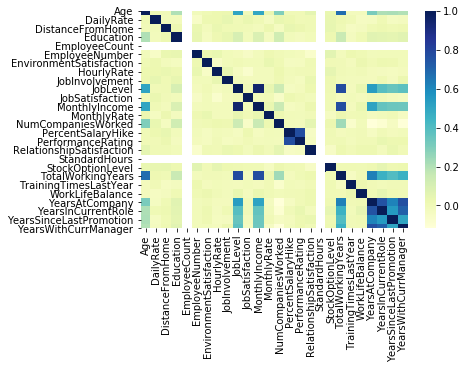

In [212]:
sns.heatmap(corr,
           xticklabels = corr.columns.values,
           yticklabels = corr.columns.values,
           cmap="YlGnBu")

In [287]:
## Gender Analysis

In [288]:
## Questions to ask Ourselves
## What is the age distribution between males and females? Are there any significant discrepancies?. 
## What is the average job satisfaction by attrition status? Is any type of gender more disatisfied than the other? 
## What is the average salary by gender? What are the number of employees by Gender in each department?

In [292]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [299]:
gender_df = df.groupby(['Gender'])['Age'].mean()
gender_df

Gender
Female    37.329932
Male      36.653061
Name: Age, dtype: float64

C:\Users\liuyu\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


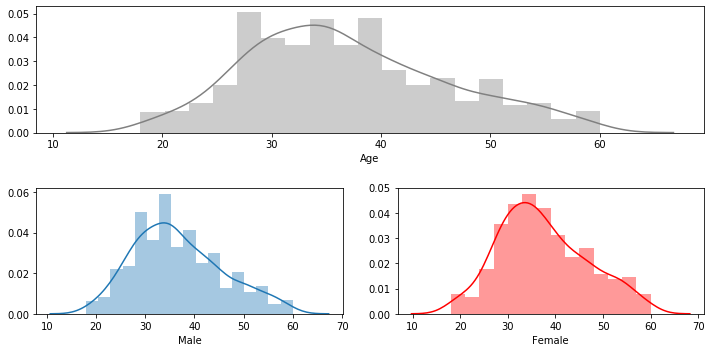

In [408]:
## Age distribution by gender
plt.figure(figsize=(10,5))
plt.subplot(2,1,1)
sns.distplot(df['Age'],color='grey')
plt.subplot(2,2,3)
sns.distplot(df['Age'][df['Gender'] == 'Male'],axlabel='Male',label='Male age')
plt.subplot(2,2,4)
sns.distplot(df['Age'][df['Gender'] == 'Female'],norm_hist=True,color = 'red', axlabel='Female')
plt.tight_layout(h_pad=2,w_pad=2)

C:\Users\liuyu\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


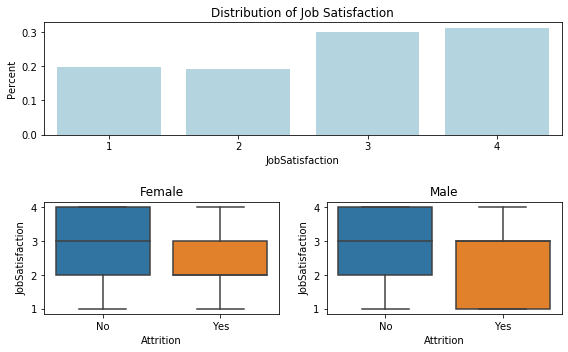

In [425]:
# distribution of job satisfaction
plt.figure(figsize = (8,5))
plt.subplot(2,1,1)
sns.barplot(x= 'JobSatisfaction',y='JobSatisfaction',data=df, estimator= lambda x:len(x)/len(df),color='lightblue')
plt.ylabel('Percent')
plt.title('Distribution of Job Satisfaction')
plt.subplot(2,2,3)
sns.boxplot(x= df.Attrition, y= df['JobSatisfaction'][df['Gender'] == 'Female'],order=['No', 'Yes'])
plt.title('Female')
plt.subplot(2,2,4)
sns.boxplot(x= df.Attrition, y= df['JobSatisfaction'][df['Gender'] == 'Male'],order=['No','Yes'])
plt.title('Male')
plt.tight_layout(h_pad=2, w_pad= 2)
plt.show()

Text(0.5, 1.0, 'income by gender')

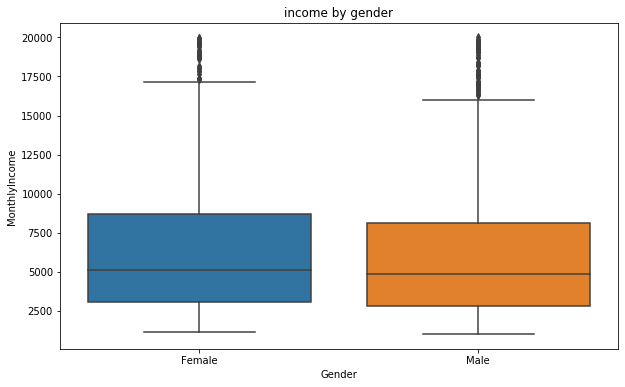

In [430]:
## Monthly income by Gender
plt.figure(figsize=(10,6))
sns.boxplot(df.Gender, df['MonthlyIncome'])
plt.title('income by gender')

In [502]:
from matplotlib.pyplot import pie, axis, show

C:\Users\liuyu\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


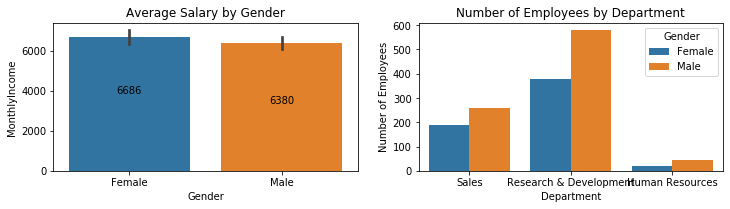

In [510]:
## Average income and presence by Department
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot(x=df.Gender, y=df.MonthlyIncome)
plt.text(x= 0, y= 4000, s='6686',va='center', ha='center')
plt.text(x= 1, y= 3500, s='6380',va='center', ha='center')
plt.title('Average Salary by Gender')
plt.subplot(2,2,2)
sns.countplot(x='Department',hue='Gender',data=df)
plt.ylabel('Number of Employees')
plt.title('Number of Employees by Department')
plt.show()


Text(0.5, 0.98, 'Attrition by Education Level')

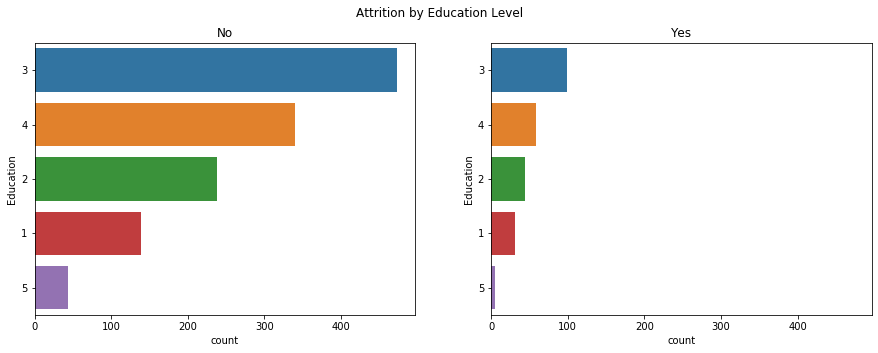

In [547]:
## Attrition by Education Level
plt.figure(figsize=(15,5))
ax =plt.subplot(1,2,1)
#sns.countplot(y='Education', data = df[df['Attrition']=='No'])
sns.countplot(y='Education', data=df[df['Attrition']=='No'],order=[3,4,2,1,5])
plt.title('No')
plt.subplot(1,2,2,sharex=ax)
sns.countplot(y='Education', data=df[df['Attrition']=='Yes'],order=[3,4,2,1,5])
plt.title('Yes')
plt.suptitle('Attrition by Education Level')

#####

#### Impact of income towards Attrition

In [548]:
#Questions to Ask Ourselves 

#What is the average monthly income by department? 
#Are there any significant differences between individuals who quit and didn't quit? 
#Are there significant changes in the level of income by Job Satisfaction? 
#Are individuals with a lower satisfaction getting much less income than the ones who are more satisfied? 
#Do employees who quit the organization have a much lower income than people who didn't quit the organization? 
#Do employees with a higher performance rating earn more than with a lower performance rating? Is the difference significant by Attrition status?

C:\Users\liuyu\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\liuyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

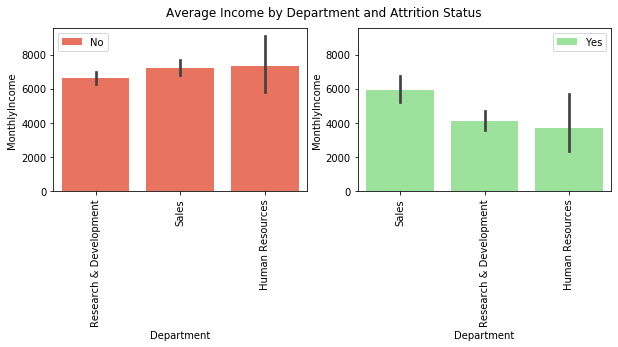

In [586]:
#Average income by Department
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
sns.barplot(x='Department',y='MonthlyIncome',data=df[df['Attrition']=='No'],color='tomato',label='No')
plt.legend(loc='best')
plt.xticks(rotation=90)
plt.subplot(1,2,2, sharey=plt.subplot(1,2,1))
sns.barplot(x='Department',y='MonthlyIncome',data=df[df['Attrition']=='Yes'],color='lightgreen',label='Yes')
plt.legend(loc='best')
plt.suptitle('Average Income by Department and Attrition Status')
plt.xticks(rotation=90)


In [615]:
#temp1 = df[df['Attrition']=='No'].groupby(['JobSatisfaction'])['MonthlyIncome'].median()
#temp2 = df[df['Attrition']=='Yes'].groupby(['JobSatisfaction'])['MonthlyIncome'].median()
temp = df.groupby(['JobSatisfaction','Attrition'])['MonthlyIncome'].median()

In [635]:
temp = temp.unstack()

Text(0.5, 1.0, 'Median Income by Attrition status')

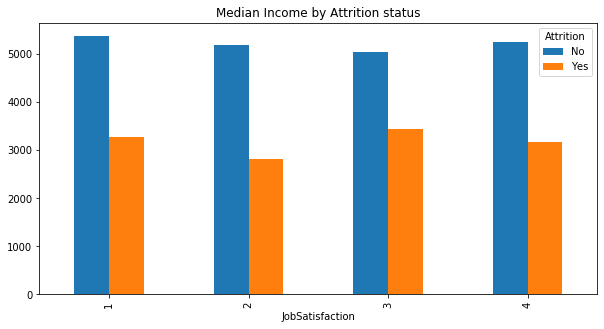

In [640]:
## is income a reason for employee to leave?
temp.plot(kind='bar',figsize=(10,5))
plt.title('Median Income by Attrition status')

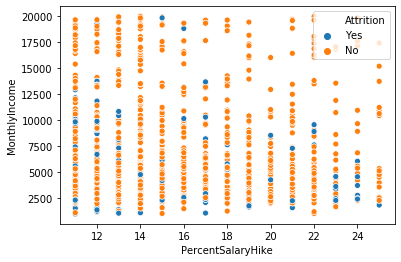

In [649]:
# Income and level of attrition
sns.scatterplot(y=df.MonthlyIncome, x=df.PercentSalaryHike, hue=df.Attrition)
plt.legend(loc='upper right')

In [658]:
## Is Overtime a important factor here?
temp1 = df.groupby(['Attrition','OverTime']).count()

In [667]:
temp1['n'] = temp1['Age']
temp1.n.unstack()

OverTime,No,Yes
Attrition,,
No,944,289
Yes,110,127


In [668]:
## We can calculate the percentage if necessary

In [672]:
## Average and Percent Difference of Daily Rates
temp_daily_rate = df.groupby(['Attrition', 'JobRole'])

In [679]:
temp_daily_rate = temp_daily_rate['JobRole', 'Attrition', 'DailyRate'].mean().unstack()

In [691]:
temp_daily_rate

DailyRate                                        \
JobRole   Healthcare Representative Human Resources Laboratory Technician   
Attrition                                                                   
No                       869.811475      760.325000            794.720812   
Yes                      643.333333      749.916667            802.645161   

                                                                \
JobRole       Manager Manufacturing Director Research Director   
Attrition                                                        
No         778.123711             802.518519        801.923077   
Yes        876.600000             708.300000        823.000000   

                                                                   
JobRole   Research Scientist Sales Executive Sales Representative  
Attrition                                                          
No                817.555102      813.910781           862.340000  
Yes               710.723404      746.350877           734.090909

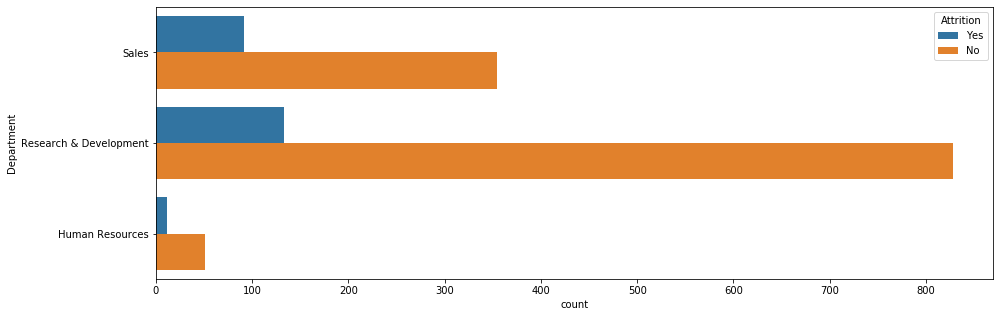

In [214]:
f, ax = plt.subplots(figsize=(15,5))
sns.countplot(y='Department',data=df, hue = 'Attrition',orient ='v')

C:\Users\liuyu\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0, 0.5, 'Percent')]

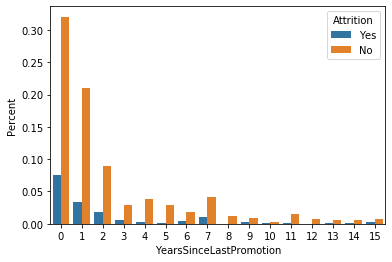

In [216]:
ax = sns.barplot(x = 'YearsSinceLastPromotion',
                y = 'YearsSinceLastPromotion',
                hue = 'Attrition',
                data = df,
                estimator = lambda x: len(x) / len(df))
ax.set(ylabel = 'Percent')

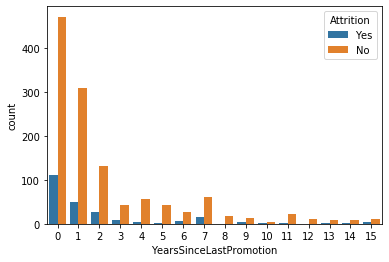

In [217]:
ax1 = sns.countplot(x = 'YearsSinceLastPromotion',
                   data = df,
                   hue = 'Attrition')

C:\Users\liuyu\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0, 0.5, 'Percent')]

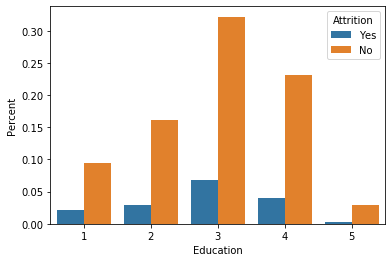

In [218]:
ax2 = sns.barplot(x = 'Education',
                y = 'Education',
                hue = 'Attrition',
                data = df,
                estimator = lambda x: len(x) / len(df))
ax2.set(ylabel = 'Percent')

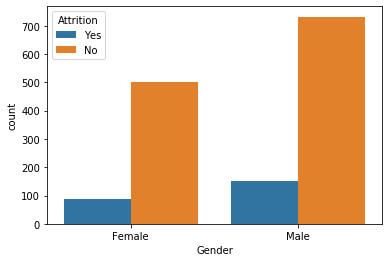

In [219]:
ax4 = sns.countplot(x = 'Gender',
                   data = df,
                   hue = 'Attrition')

In [220]:
col_categorical = df[['Gender','Education','Department']]

In [221]:
col_categorical.head()

,Gender,Education,Department
0,Female,2,Sales
1,Male,1,Research & Development
2,Male,2,Research & Development
3,Female,4,Research & Development
4,Male,1,Research & Development


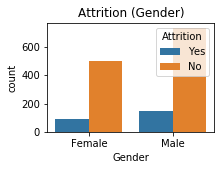

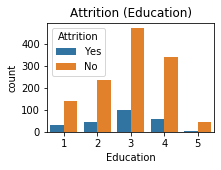

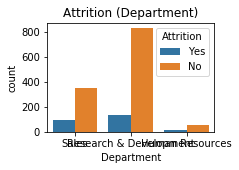

In [222]:
#fig, ax = plt.subplots(nrows = 1, ncols = 3,figsize = (20,5))
for i in list(range(len(col_categorical.columns))):
    fig, ax = plt.subplots(figsize = (3,2))
    sns.countplot(x = col_categorical.columns[i],
                   data = df,
                   hue = 'Attrition')
    ax.set_title('Attrition ('+ col_categorical.columns[i]+ ')')

In [223]:
df.Department.value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

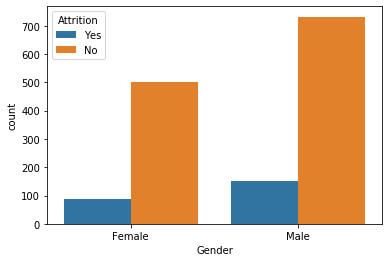

In [224]:
sns.countplot(x = 'Gender',
                   data = df,
                   hue = 'Attrition')

### Modeling

##### Logistic Regression

In [712]:
#Read the analytics csv file and store our dataset into a dataframe called "df"
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve
from sklearn.preprocessing import RobustScaler

In [700]:
### Feature Importance
## since we have more than 30 variables and we may need to deduct some not very important ones
## we will use decision tree classifier

In [713]:
le = preprocessing.LabelEncoder()

In [722]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel               int32
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [715]:
le.fit(df.BusinessTravel)

LabelEncoder()

In [718]:
le.classes_

array(['Non-Travel', 'Travel_Frequently', 'Travel_Rarely'], dtype=object)

In [721]:
df['BusinessTravel'] = le.transform(df.BusinessTravel)

In [723]:
for i in ['Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime']:
    le.fit(df[i])
    df[i] = le.transform(df[i])

In [724]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel               int32
DailyRate                    int64
Department                   int32
DistanceFromHome             int64
Education                    int64
EducationField               int32
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                       int32
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                      int32
JobSatisfaction              int64
MaritalStatus                int32
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                       int32
OverTime                     int32
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [725]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [726]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,6)

In [727]:
# Create train and test splits
target_name = 'Attrition'
X = df.drop('Attrition', axis=1)

In [728]:
y=df[target_name]

In [729]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=123, stratify=y)

In [730]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [731]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                   Specs          Score
17         MonthlyIncome  127922.293694
18           MonthlyRate    1196.633553
2              DailyRate     956.580494
27     TotalWorkingYears     230.721618
30        YearsAtCompany     142.100054
31    YearsInCurrentRole     117.522596
33  YearsWithCurrManager     110.671534
0                    Age      84.155277
21              OverTime      63.845067
4       DistanceFromHome      63.772142


In [732]:
dtree = tree.DecisionTreeClassifier(
    #max_depth=3,
    class_weight="balanced",
    min_weight_fraction_leaf=0.01
    )
dtree = dtree.fit(X_train,y_train)


In [733]:
## plot the importances ##
importances = dtree.feature_importances_
feat_names = df.drop(['Attrition'],axis=1).columns


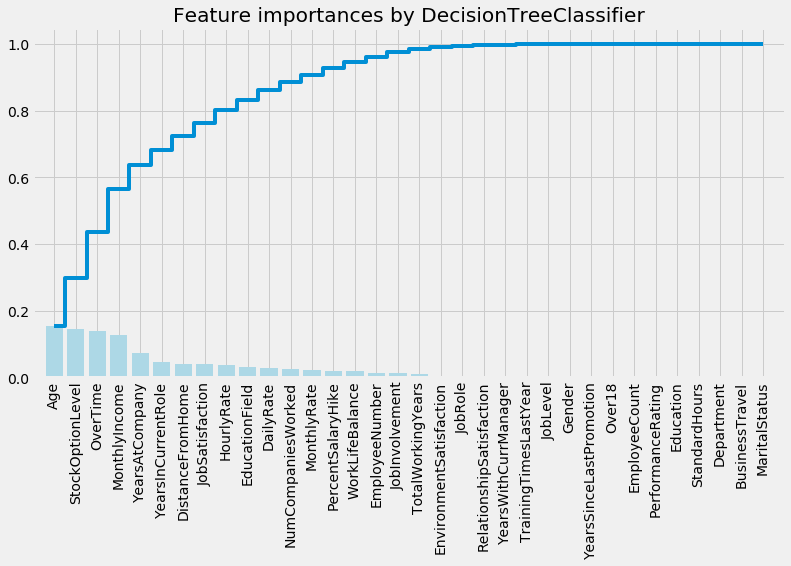

In [734]:
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances by DecisionTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

In [735]:
## Then we will select top 5 feature for logistic regression, but keep in mind that the features we selected may not 
# as important as we expected. Must think about it with business sense

In [736]:
front= df['Attrition']
df.drop(labels=['Attrition'], axis=1, inplace= True)
df.insert(0,'Attrition', front)

In [737]:
df.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,41,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,No,49,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,Yes,37,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,No,33,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,No,27,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


In [738]:
df['int'] = 1
indep_var = ['Age', 'StockOptionLevel', 'OverTime', 'MonthlyIncome','YearsAtCompany','int', 'Attrition']
df = df[indep_var]

In [744]:
le.fit(df['Attrition'])
df['Attrition'] = le.transform(df['Attrition'])

C:\Users\liuyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [768]:
df.head()

,Age,StockOptionLevel,OverTime,MonthlyIncome,YearsAtCompany,int,Attrition
0,41,0,1,5993,6,1,1
1,49,1,0,5130,10,1,0
2,37,0,1,2090,0,1,1
3,33,0,1,2909,8,1,0
4,27,1,0,3468,2,1,0


In [746]:
target_name = 'Attrition'
X = df.drop('Attrition', axis=1)

y=df[target_name]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=123, stratify=y)

X_train.head()

,Age,StockOptionLevel,OverTime,MonthlyIncome,YearsAtCompany,int
639,49,1,0,3580,4,1
1019,36,2,0,5647,3,1
1389,31,0,0,5003,10,1
1392,35,0,1,5204,10,1
1347,36,0,0,3886,10,1


In [747]:
import statsmodels.api as sm
iv = ['Age', 'StockOptionLevel', 'OverTime', 'MonthlyIncome','YearsAtCompany','int']
logReg = sm.Logit(y_train, X_train[iv])
answer = logReg.fit()

answer.summary
answer.params

Optimization terminated successfully.
         Current function value: 0.381660
         Iterations 7


Age                -0.030986
StockOptionLevel   -0.530509
OverTime            1.340164
MonthlyIncome      -0.000072
YearsAtCompany     -0.051855
int                 0.033707
dtype: float64

##### We could have a Employee Turnover Score = Age*(-0.03) + StockOptionLevel*(-0.530509) + OverTime*(1.340164) + YearsAtCompany*(-0.051855) + 0.0337

In [761]:
# Create function to compute coefficients
coef = answer.params
def y (coef, Age, StockOptionLevel, OverTime, MonthlyIncome,YearsAtCompany) : 
    return coef[5] + coef[0]*Age + coef[1]*StockOptionLevel + coef[2]*OverTime + coef[3]*MonthlyIncome + coef[4]*YearsAtCompany

import numpy as np

# An Employee with 30 years old, have no stock, with Overtime, has monthlyincome of 4500, worked 5 years
y1 = y(coef,30,0,1,4500,5)
p = np.exp(y1) / (1+np.exp(y1))
p

0.46482822014065883

In [765]:
## we can have our retention plan for IBM
## now look at the accuracy of out model

In [769]:
mydf = pd.read_csv('C:/Users/liuyu/Documents/Kaggle datasets/IBM HR analytics/ibm-hr-analytics-employee-attrition-performance/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [770]:
for i in ['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime','Attrition']:
    le.fit(mydf[i])
    mydf[i] = le.transform(mydf[i])

In [767]:
# Create base rate model
def base_rate_model(X) :
    y = np.zeros(X.shape[0])
    return y

In [772]:
# Create train and test splits
target_name = 'Attrition'
X = mydf.drop('Attrition', axis=1)
#robust_scaler = RobustScaler()
#X = robust_scaler.fit_transform(X)
y=mydf[target_name]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=123, stratify=y)

In [773]:
# Check accuracy of base rate model
y_base_rate = base_rate_model(X_test)
from sklearn.metrics import accuracy_score
print ("Base rate accuracy is %2.2f" % accuracy_score(y_test, y_base_rate))

Base rate accuracy is 0.84


In [ ]:
# Create train and test splits
target_name = 'Attrition'
X = df.drop('Attrition', axis=1)
#robust_scaler = RobustScaler()
#X = robust_scaler.fit_transform(X)
y=df[target_name]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=123, stratify=y)

In [763]:
# Check accuracy of Logistic Model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l2', C=1)

model.fit(X_train, y_train)
print ("Logistic accuracy is %2.2f" % accuracy_score(y_test, model.predict(X_test)))

Logistic accuracy is 0.85


C:\Users\liuyu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [764]:
# Using 10 fold Cross-Validation to train our Logistic Regression Model
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression(class_weight = "balanced")
scoring = 'roc_auc'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))

AUC: 0.743 (0.082)


C:\Users\liuyu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\liuyu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\liuyu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\liuyu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\liuyu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

#### ------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Other models

In [775]:
# Compare the Logistic Regression Model V.S. Base Rate Model V.S. Random Forest Model
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier


In [776]:
print ("---Base Model---")
base_roc_auc = roc_auc_score(y_test, base_rate_model(X_test))
print ("Base Rate AUC = %2.2f" % base_roc_auc)
print(classification_report(y_test, base_rate_model(X_test)))

# NOTE: By adding in "class_weight = balanced", the Logistic Auc increased by about 10%! This adjusts the threshold value
logis = LogisticRegression(class_weight = "balanced")
logis.fit(X_train, y_train)
print ("\n\n ---Logistic Model---")
logit_roc_auc = roc_auc_score(y_test, logis.predict(X_test))
print ("Logistic AUC = %2.2f" % logit_roc_auc)
print(classification_report(y_test, logis.predict(X_test)))

# Decision Tree Model
dtree = tree.DecisionTreeClassifier(
    #max_depth=3,
    class_weight="balanced",
    min_weight_fraction_leaf=0.01
    )
dtree = dtree.fit(X_train,y_train)
print ("\n\n ---Decision Tree Model---")
dt_roc_auc = roc_auc_score(y_test, dtree.predict(X_test))
print ("Decision Tree AUC = %2.2f" % dt_roc_auc)
print(classification_report(y_test, dtree.predict(X_test)))

# Random Forest Model
rf = RandomForestClassifier(
    n_estimators=1000, 
    max_depth=None, 
    min_samples_split=10, 
    class_weight="balanced"
    #min_weight_fraction_leaf=0.02 
    )
rf.fit(X_train, y_train)
print ("\n\n ---Random Forest Model---")
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
print ("Random Forest AUC = %2.2f" % rf_roc_auc)
print(classification_report(y_test, rf.predict(X_test)))


# Ada Boost
ada = AdaBoostClassifier(n_estimators=400, learning_rate=0.1)
ada.fit(X_train,y_train)
print ("\n\n ---AdaBoost Model---")
ada_roc_auc = roc_auc_score(y_test, ada.predict(X_test))
print ("AdaBoost AUC = %2.2f" % ada_roc_auc)
print(classification_report(y_test, ada.predict(X_test)))

---Base Model---
Base Rate AUC = 0.50
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       185
           1       0.00      0.00      0.00        36

    accuracy                           0.84       221
   macro avg       0.42      0.50      0.46       221
weighted avg       0.70      0.84      0.76       221



 ---Logistic Model---
Logistic AUC = 0.74
              precision    recall  f1-score   support

           0       0.94      0.72      0.82       185
           1       0.35      0.75      0.47        36

    accuracy                           0.73       221
   macro avg       0.64      0.74      0.65       221
weighted avg       0.84      0.73      0.76       221



 ---Decision Tree Model---
Decision Tree AUC = 0.72
              precision    recall  f1-score   support

           0       0.92      0.82      0.87       185
           1       0.40      0.61      0.48        36

    accuracy                           0.79   

C:\Users\liuyu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\liuyu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\liuyu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\liuyu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)




 ---Random Forest Model---
Random Forest AUC = 0.57
              precision    recall  f1-score   support

           0       0.86      0.98      0.91       185
           1       0.60      0.17      0.26        36

    accuracy                           0.85       221
   macro avg       0.73      0.57      0.59       221
weighted avg       0.82      0.85      0.81       221



 ---AdaBoost Model---
AdaBoost AUC = 0.61
              precision    recall  f1-score   support

           0       0.87      0.99      0.92       185
           1       0.80      0.22      0.35        36

    accuracy                           0.86       221
   macro avg       0.83      0.61      0.64       221
weighted avg       0.86      0.86      0.83       221



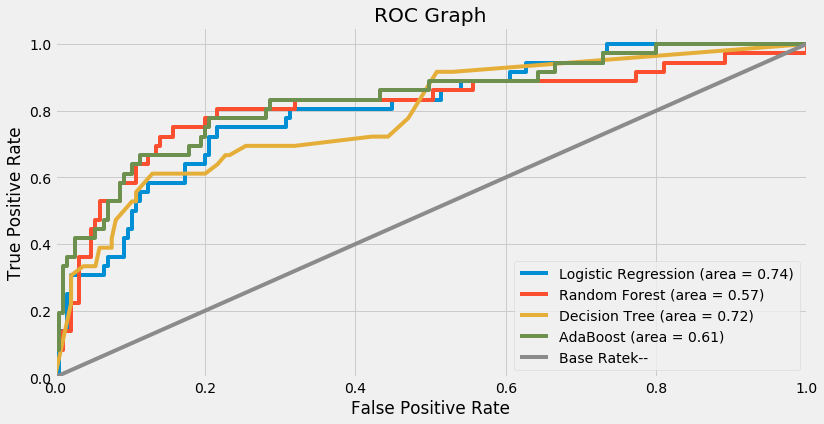

In [780]:
# Create ROC Graph
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, logis.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, dtree.predict_proba(X_test)[:,1])
ada_fpr, ada_tpr, ada_thresholds = roc_curve(y_test, ada.predict_proba(X_test)[:,1])

plt.figure()

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)

# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)

# Plot Decision Tree ROC
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (area = %0.2f)' % dt_roc_auc)

# Plot AdaBoost ROC
plt.plot(ada_fpr, ada_tpr, label='AdaBoost (area = %0.2f)' % ada_roc_auc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

In [781]:
roc_auc_score(y_test, logis.predict_proba(X_test)[:,1])

0.8028528528528528

In [782]:
roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])

0.8115615615615616

In [783]:
roc_auc_score(y_test, dtree.predict_proba(X_test)[:,1])

0.7846096096096096

In [784]:
roc_auc_score(y_test, ada.predict_proba(X_test)[:,1])

0.8333333333333334